# Ejemplos con Wordcount

## RDD paralelizando datos

In [1]:
data = [1, 2, 3, 4, 5]
distData = sc.parallelize(data)
print distData 

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:392


## Uso el contenido de un archivo de texto como fuente de datos

In [2]:
textFile = sc.textFile("/usr/local/bin/spark-1.3.1-bin-hadoop2.6/README.md")

## Cuento palabras (flatMap, map, reduceByKey)

In [3]:
wordCounts = textFile.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)

## Muestro todas las tuplas (collect)

In [4]:
wordCounts.collect()

[(u'all', 1),
 (u'help', 1),
 (u'when', 1),
 (u'automated', 1),
 (u'Hadoop', 4),
 (u'"local"', 1),
 (u'including', 3),
 (u'computation', 1),
 (u'["Third', 1),
 (u'file', 1),
 (u'high-level', 1),
 (u'find', 1),
 (u'web', 1),
 (u'Shell', 2),
 (u'cluster', 2),
 (u'how', 2),
 (u'using:', 1),
 (u'Big', 1),
 (u'guidance', 3),
 (u'run:', 1),
 (u'Scala,', 1),
 (u'Running', 1),
 (u'should', 2),
 (u'environment', 1),
 (u'to', 14),
 (u'only', 1),
 (u'given.', 1),
 (u'rich', 1),
 (u'directory.', 1),
 (u'Apache', 1),
 (u'Interactive', 2),
 (u'sc.parallelize(range(1000)).count()', 1),
 (u'Building', 1),
 (u'do', 2),
 (u'guide,', 1),
 (u'return', 2),
 (u'graphs', 1),
 (u'Programs', 1),
 (u'Many', 1),
 (u'Try', 1),
 (u'built,', 1),
 (u'"yarn-client"', 1),
 (u'YARN,', 1),
 (u'not', 1),
 (u'using', 2),
 (u'Example', 1),
 (u'scala>', 1),
 (u'Once', 1),
 (u'Spark"](http://spark.apache.org/docs/latest/building-spark.html).', 1),
 (u'Because', 1),
 (u'cluster.', 1),
 (u'name', 1),
 (u'Testing', 1),
 (u'Spar

## Las 5 palabras que más aparecen (takeOrdered)

In [5]:
wordCounts.takeOrdered(5, key = lambda x: -x[1])

[(u'the', 21), (u'to', 14), (u'Spark', 14), (u'for', 11), (u'and', 10)]

## Las 5 palabras que más aparecen pero calculandolo afuera de Spark

In [6]:
words = wordCounts.collect()
words.sort(key = lambda x: -x[1])
print words[0:10]

[(u'the', 21), (u'to', 14), (u'Spark', 14), (u'for', 11), (u'and', 10), (u'a', 9), (u'##', 8), (u'run', 7), (u'can', 6), (u'on', 6)]


## Las 5 palabras que más aparecen usando grupos (groupByKey)

In [7]:
textFile.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).groupByKey().takeOrdered(5, lambda (key, value): -1 * len(value))

[(u'the', <pyspark.resultiterable.ResultIterable at 0xb0e9bf4c>),
 (u'to', <pyspark.resultiterable.ResultIterable at 0xb0e2004c>),
 (u'Spark', <pyspark.resultiterable.ResultIterable at 0xb0e2006c>),
 (u'for', <pyspark.resultiterable.ResultIterable at 0xb0e2008c>),
 (u'and', <pyspark.resultiterable.ResultIterable at 0xb0e200ac>)]

## La palabra más larga (reduce)

In [8]:
textFile.flatMap(lambda line: line.split()).reduce(lambda a, b: a if (len(a) > len(b)) else b)

u'tests](https://cwiki.apache.org/confluence/display/SPARK/Contributing+to+Spark#ContributingtoSpark-AutomatedTesting).'

## Palabras que empiezan con a (filter)

In [9]:
textFile.flatMap(lambda line: line.split()).filter(lambda word: word.startswith('a')).collect()

[u'a',
 u'and',
 u'and',
 u'and',
 u'an',
 u'analysis.',
 u'also',
 u'a',
 u'and',
 u'and',
 u'a',
 u'and',
 u'and',
 u'a',
 u'available',
 u'at',
 u'also',
 u'also',
 u'a',
 u'a',
 u'and',
 u'also',
 u'an',
 u'abbreviated',
 u'are',
 u'all',
 u'automated',
 u'and',
 u'against',
 u'at',
 u'a',
 u'and',
 u'also',
 u'a',
 u'application',
 u'a',
 u'an']

## Palabras únicas que empiezan con a (distinct)

In [10]:
textFile.flatMap(lambda line: line.split()).filter(lambda word: word.startswith('a')).distinct().collect()

[u'a',
 u'and',
 u'abbreviated',
 u'also',
 u'available',
 u'all',
 u'against',
 u'an',
 u'application',
 u'analysis.',
 u'automated',
 u'at',
 u'are']

## Cantidad de palabras por frecuencia de repetición ordenados (sortByKey)

In [11]:
rangeCounts = wordCounts.map(lambda set: (set[1], 1)).reduceByKey(lambda a, b: a+b).sortByKey().collect()
rangeCounts

[(1, 194),
 (2, 41),
 (3, 13),
 (4, 4),
 (5, 3),
 (6, 3),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (14, 2),
 (21, 1)]

## Graficando cantidad de palabras por frecuencia de repetición

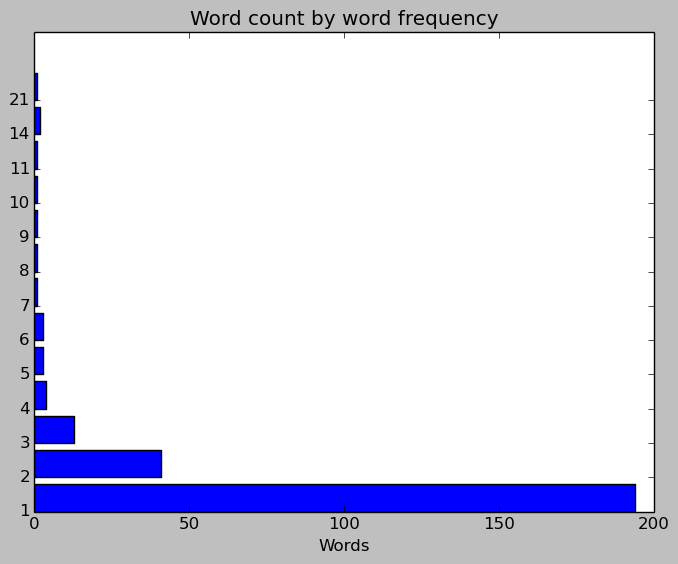

In [12]:
import numpy as np
import matplotlib.pyplot as plt

ranges = [t[0] for t in rangeCounts]
y_pos = np.arange(len(ranges))
words = [t[1] for t in rangeCounts]

plt.barh(y_pos, words)
plt.yticks(y_pos, ranges)
plt.xlabel('Words')
plt.title('Word count by word frequency')

plt.show()